In [1]:
install.packages("Lahman") #install package

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [2]:
install.packages("data.table") #install package

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [3]:
library("Lahman") #loads package 

In [4]:
library("data.table") #loads package

In [5]:
teams = as.data.table(Teams) #Use data.table to 

In [7]:
teams = teams[, .(yearID, 
                  lgID = as.character(lgID), 
                  teamID = as.character(teamID), 
                  franchID = as.character(franchID),
                  Rank, G, W, L, R, ERA, SO, 
                  WinPercent = W/(W+L))]

In [8]:
salaries = as.data.table(Salaries)

In [9]:
salaries = salaries[, c("lgID", "teamID", "salary1M") := 
                      list(as.character(lgID), as.character(teamID), salary / 1e6L)]

In [10]:
payroll = salaries[, .(payroll = sum(salary1M)), by=.(teamID, yearID)]

In [11]:
teamPayroll = merge(teams, payroll, by=c("teamID","yearID"))

In [16]:
head(teamPayroll)

teamID,yearID,lgID,franchID,Rank,G,W,L,R,ERA,SO,WinPercent,payroll
ANA,1997,AL,ANA,2,162,84,78,829,4.52,953,0.5185185,31.13547
ANA,1998,AL,ANA,2,162,85,77,787,4.49,1028,0.5246914,41.28100
ANA,1999,AL,ANA,4,162,70,92,711,4.79,1022,0.4320988,55.38817
ANA,2000,AL,ANA,3,162,82,80,864,5.00,1024,0.5061728,51.46417
ANA,2001,AL,ANA,3,162,75,87,691,4.20,1001,0.4629630,47.53517
ANA,2002,AL,ANA,2,162,99,63,851,3.69,805,0.6111111,61.72167


In [33]:
teamPayrollP <- teamPayroll[yearID >= "2000"]

In [34]:
head(teamPayrollP)

teamID,yearID,lgID,franchID,Rank,G,W,L,R,ERA,SO,WinPercent,payroll
ANA,2000,AL,ANA,3,162,82,80,864,5.00,1024,0.5061728,51.46417
ANA,2001,AL,ANA,3,162,75,87,691,4.20,1001,0.4629630,47.53517
ANA,2002,AL,ANA,2,162,99,63,851,3.69,805,0.6111111,61.72167
ANA,2003,AL,ANA,3,162,77,85,736,4.28,838,0.4753086,79.03167
ANA,2004,AL,ANA,1,162,92,70,836,4.28,942,0.5679012,100.53467
ARI,2000,NL,ARI,3,162,85,77,792,4.35,975,0.5246914,81.02783


In [35]:
install.packages("ggplot2")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [36]:
library("ggplot2")

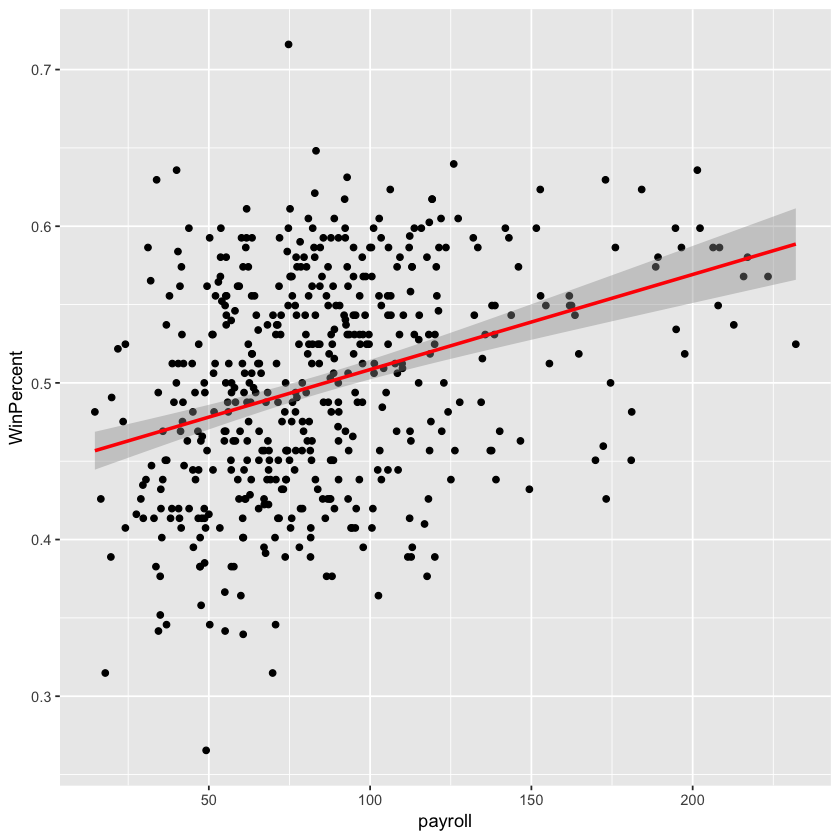

In [37]:
ggplot(teamPayrollP, 
       aes(x= payroll, y = WinPercent)) +geom_point() + stat_smooth(method = "lm", col = "red")